# 쇼핑몰 주문 데이터 분석

- data source : https://archive.ics.uci.edu/ml/datasets/online+retail#


## Features

- InvoiceNo(주문번호): Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode(상품코드): Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description(상품설명): Product (item) name. Nominal.
- Quantity(주문수량): The quantities of each product (item) per transaction. Numeric.
- InvoiceDate(주문시각): Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice(상품가격): Unit price. Numeric, Product price per unit in sterling.
- CustomerID(구매자ID): Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country(고객 거주 국가): Country name. Nominal, the name of the country where each customer resides.


## Pereiod
2010-12-01 ~ 2011-12-09

# 1. 데이터 기본정보 살펴보고 전처리하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pandas로 excel파일 읽어오는데 에러 발생해서, pip와 xlrd 업데이트실행

`!pip install --upgrade xlrd`

In [2]:
df = pd.read_excel('/Users/seulalee/OneDrive/Personal_Project/UCI_OnlineRetail/Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.InvoiceDate.min()
# df.InvoiceDate.max()

Timestamp('2010-12-01 08:26:00')

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### UnitPrice랑 Quantity의 min값이 음수. Quantity와 UnitPrice가 음수인 경우 확인해보고 처리 하기

In [6]:
df[df['UnitPrice'] == 0]
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


UnitPrice에서 음수가 나오는 경우, 판매자가 대금을 정상적으로 정산받지 못해 회계상의 금액 조정을 위한 항목으로 보임.   
UnitPrice에서 0이 나오는 경우, 판매자가 재고수량을 맞추기 위해 임의로 발생시킨 항목 등으로 추정됨.   
두 경우 모두 실제 거래 발생과 무관하므로 삭제

In [7]:
df = df[df['UnitPrice'] > 0]
df[df['Quantity'] < 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df[df['Quantity'] < 0].nunique()
# df[df['Quantity'] == 0].nunique()

InvoiceNo      3836
StockCode      1947
Description    1972
Quantity        135
InvoiceDate    3766
UnitPrice       573
CustomerID     1589
Country          30
dtype: int64

unique()값의 갯수로 보아 특정 상품이나 주문에서만 집중적으로 나타난 것은 아님.  
다른 정보가 없는 상황에서 해당 값은 오류이거나 UnitPrice와 동일하게 회계상의 balance를 맞추기 위해 발생된 거래로 추정할 수 있음.  
역시 실제 거래 발생과 무관하므로 제거

In [9]:
df = df[df['Quantity'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### StockCode에 알파벳으로만 된 경우 뭔지 확인해보기 (일종의 코드북처럼 분류값이 데이터에 섞여 있을수 있어서 확인)

In [10]:
df['StockCode'].str.isalpha()

0         False
1           NaN
2         False
3         False
4         False
          ...  
541904      NaN
541905      NaN
541906      NaN
541907      NaN
541908      NaN
Name: StockCode, Length: 530104, dtype: object

In [11]:
# df['StockCode']에 숫자만으로 된 값이 있어서 True, False 이외에도 NaN값이 반환되어서 마스킹으로 해당 조건에 맞는 것만 걸러 볼 수가 없음
# 해당 컬럼의 값을 전부 str으로 바꾸고 isalpha()로 마스킹하기
df = df.astype({'StockCode':'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  string        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), string(1)
memory usage: 36.4+ MB


In [12]:
df[df['StockCode'].str.isalpha()].head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.00,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.00,12686.0,France
5325,536858,POST,POSTAGE,2,2010-12-03 10:36:00,40.00,13520.0,Switzerland


딱히 해당 StockCode에서 문제가 될만한건 없어보임.

### 결측값 확인 후 처리

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

- 주문자ID 가 없는 데이터 존재하는데, 그 외의 제품과 국가 등의 정보가 존재하기 때문에 해당 레코드들은 굳이 제거할 필요 없음

# 2. 주요 지표별 매출액 확인하기

## a. 전체 매출액/거래건수 측면
- 전체 매출액 추이
- 월별 매출액 추이  
    - 매출이 증가추세인가, 감소세인가? 증가추세라면 어느 정도 증가하는가? 어디서 증가하는가?
- 국가별 매출액 비중 (히트맵으로)

In [14]:
# 매출액을 살펴보기 위해 CheckoutPrice 칼럼 추가
df['CheckoutPrice'] = df['UnitPrice'] * df['Quantity']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


- 전체 매출액/거래건수 추세 확인하기

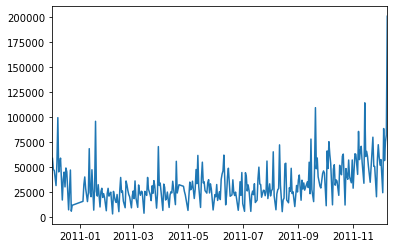

In [15]:
# 매출액 날짜별 추세를 보기위해서 날짜 
df['Date'] = df['InvoiceDate'].dt.date
# 날짜별 checkoutprice를 합계내서 plot으로 보기
agg_by_date = df.groupby('Date').sum('CheckoutPrice').reset_index()
plt.plot(agg_by_date['Date'], agg_by_date['CheckoutPrice'])
plt.xlim(agg_by_date['Date'].min(), agg_by_date['Date'].max())
plt.show()

- 전체 추세가 잘 안보임. 월단위 매출로 바꿔서 보기

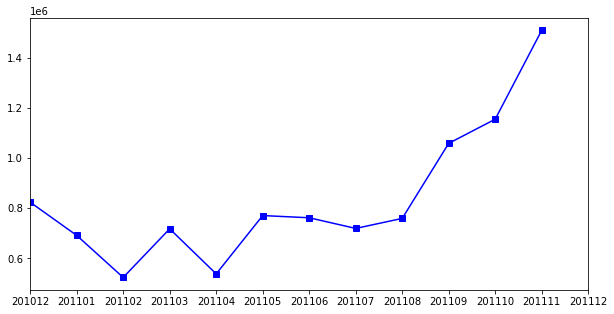

In [34]:
# 연월 칼럼 추가하기
df['YearMonth'] = df['InvoiceDate'].dt.strftime("%Y%m")

# 2011-12는 9일까지밖에 데이터가 없어 한달 단위 매출액이 제대로 산출되지 않음으로 2011-12를 제외하고 보기
agg_by_month = df[df['InvoiceDate'] < '2011-12-01']

agg_by_month = agg_by_month.groupby(['YearMonth']).sum('CheckoutPrice').reset_index()
plt.figure(figsize=(10, 5))
plt.plot(agg_by_month['YearMonth'], agg_by_month['CheckoutPrice'], 'bs-')
plt.xlim(agg_by_month['YearMonth'].min(), df['YearMonth'].max())
plt.show()

- 2011-12에 보이는 매출감소는 2011-12는 9일까지밖에 데이터가 없어서 그렇게 보이는 것임.
- 해당 데이터는 1년밖에 커버하고 있지 않아서 매출액 변화에 계절(시기)에 따른 패턴이 있는지는 확인할 수 없음  

- 월별 매출액을 볼 때는 2011-12에 해당하는 데이터는 제거하고 봐야함

In [38]:
# 월별, 국가별로 매출액 보기
# 피벗테이블로 year/국가1/국가2/
share_by_month = pd.pivot_table(df, index='YearMonth', columns='Country', values=['CheckoutPrice'], aggfunc='sum')
share_by_month = share_by_month.fillna(0)
share_by_month

CheckoutPrice                                             \
Country       Australia  Austria Bahrain  Belgium  Brazil   Canada   
YearMonth                                                            
201012          1032.85   277.20  205.74  1809.91     0.0     0.00   
201101          9017.71     0.00    0.00  1200.20     0.0     0.00   
201102         14695.42   518.36    0.00  2181.07     0.0     0.00   
201103         17223.99  1708.12    0.00  3351.98     0.0   140.54   
201104           771.60   680.78    0.00  1989.48  1143.6     0.00   
201105         13638.41  1249.43  548.40  2732.40     0.0   534.24   
201106         25187.77     0.00    0.00  4274.82     0.0  1171.46   
201107          4964.38  1191.95    0.00  2475.57     0.0  1768.58   
201108         22489.20  1516.08    0.00  3554.02     0.0    51.56   
201109          5106.73     0.00    0.00  4208.02     0.0     0.00   
201110         17150.53  1043.78    0.00  5685.38     0.0     0.00   
201111          7242.72  1329.78    0.00  6315.76     0.0     0.00   
201112             0.00   683.20    0.00  1417.73     0.0     0.00   

                                                            ...           \
Country   Channel Islands   Cyprus Czech Republic  Denmark  ...      RSA   
YearMonth                                                   ...            
201012             363.53  1590.82           0.00  1281.50  ...     0.00   
201101             675.58   547.50           0.00     0.00  ...     0.00   
201102            1784.71  4334.24         549.26   399.22  ...     0.00   
201103            3509.33   938.39           0.00  3978.99  ...     0.00   
201104             293.00     0.00           0.00     0.00  ...     0.00   
201105            1207.24     0.00           0.00   515.70  ...     0.00   
201106            2060.03  1109.32           0.00  3261.15  ...     0.00   
201107               0.00     0.00           0.00   376.24  ...     0.00   
201108            4896.78     0.00           0.00   213.15  ...     0.00   
201109            1323.75   196.35           0.00  4570.16  ...     0.00   
201110            2623.32  4412.87         277.48  1490.76  ...  1002.31   
201111            1514.77   460.89           0.00  2699.57  ...     0.00   
201112             198.40     0.00           0.00   168.90  ...     0.00   

                                                                          \
Country   Saudi Arabia Singapore     Spain   Sweden Switzerland      USA   
YearMonth                                                                  
201012            0.00      0.00   1843.73  3834.30     1304.92     0.00   
201101            0.00   2053.07  10086.09  3486.32     4231.23     0.00   
201102          145.92      0.00   2114.50   509.50     2654.92     0.00   
201103            0.00      0.00   5363.15  4720.58     1870.23     0.00   
201104            0.00   8209.58   1785.65   809.10     2076.94   383.95   
201105            0.00      0.00   3257.60  2681.98     3610.01     0.00   
201106            0.00      0.00   3333.21   832.00     7904.15     0.00   
201107            0.00   3949.32   7624.92  6802.09     3998.61     0.00   
201108            0.00      0.00   3346.91  1400.86     4969.89     0.00   
201109            0.00      0.00   5189.24  4575.21     8284.86     0.00   
201110            0.00   7067.32   8636.94  5766.16     8065.18  2311.20   
201111            0.00      0.00   8678.96  2722.23     8118.96     0.00   
201112            0.00      0.00    316.21   238.00        0.00   885.24   

                                                           
Country   United Arab Emirates United Kingdom Unspecified  
YearMonth                                                  
201012                    0.00     748268.980        0.00  
201101                    0.00     561289.980        0.00  
201102                  889.24     430027.950        0.00  
201103                    0.00     586230.280        0.00  
201104                    0.00     

In [151]:
share_by_month = pd.pivot_table(agg_by_month, index='YearMonth', columns='Country', values=['CheckoutPrice'], aggfunc='sum')
share_by_month.fillna(0)
share_by_month.sum(axis=0)
share_by_month

CheckoutPrice                                             \
Country       Australia  Austria Bahrain  Belgium  Brazil   Canada   
YearMonth                                                            
201012          1032.85   277.20  205.74  1809.91     NaN      NaN   
201101          9017.71      NaN     NaN  1200.20     NaN      NaN   
201102         14695.42   518.36     NaN  2181.07     NaN      NaN   
201103         17223.99  1708.12     NaN  3351.98     NaN   140.54   
201104           771.60   680.78     NaN  1989.48  1143.6      NaN   
201105         13638.41  1249.43  548.40  2732.40     NaN   534.24   
201106         25187.77      NaN     NaN  4274.82     NaN  1171.46   
201107          4964.38  1191.95     NaN  2475.57     NaN  1768.58   
201108         22489.20  1516.08     NaN  3554.02     NaN    51.56   
201109          5106.73      NaN     NaN  4208.02     NaN      NaN   
201110         17150.53  1043.78     NaN  5685.38     NaN      NaN   
201111          7242.72  1329.78     NaN  6315.76     NaN      NaN   

                                                            ...           \
Country   Channel Islands   Cyprus Czech Republic  Denmark  ...      RSA   
YearMonth                                                   ...            
201012             363.53  1590.82            NaN  1281.50  ...      NaN   
201101             675.58   547.50            NaN      NaN  ...      NaN   
201102            1784.71  4334.24         549.26   399.22  ...      NaN   
201103            3509.33   938.39            NaN  3978.99  ...      NaN   
201104             293.00      NaN            NaN      NaN  ...      NaN   
201105            1207.24      NaN            NaN   515.70  ...      NaN   
201106            2060.03  1109.32            NaN  3261.15  ...      NaN   
201107                NaN      NaN            NaN   376.24  ...      NaN   
201108            4896.78      NaN            NaN   213.15  ...      NaN   
201109            1323.75   196.35            NaN  4570.16  ...      NaN   
201110            2623.32  4412.87         277.48  1490.76  ...  1002.31   
201111            1514.77   460.89            NaN  2699.57  ...      NaN   

                                                                          \
Country   Saudi Arabia Singapore     Spain   Sweden Switzerland      USA   
YearMonth                                                                  
201012             NaN       NaN   1843.73  3834.30     1304.92      NaN   
201101             NaN   2053.07  10086.09  3486.32     4231.23      NaN   
201102          145.92       NaN   2114.50   509.50     2654.92      NaN   
201103             NaN       NaN   5363.15  4720.58     1870.23      NaN   
201104             NaN   8209.58   1785.65   809.10     2076.94   383.95   
201105             NaN       NaN   3257.60  2681.98     3610.01      NaN   
201106             NaN       NaN   3333.21   832.00     7904.15      NaN   
201107             NaN   3949.32   7624.92  6802.09     3998.61      NaN   
201108             NaN       NaN   3346.91  1400.86     4969.89      NaN   
201109             NaN       NaN   5189.24  4575.21     8284.86      NaN   
201110             NaN   7067.32   8636.94  5766.16     8065.18  2311.20   
201111             NaN       NaN   8678.96  2722.23     8118.96      NaN   

                                                           
Country   United Arab Emirates United Kingdom Unspecified  
YearMonth                                                  
201012                     NaN     748268.980         NaN  
201101                     NaN     561289.980         NaN  
201102                  889.24     430027.950         NaN  
201103                     NaN     586230.280         NaN  
201104                     NaN     476517.761      299.10  
201105                     NaN     639314.360     1055.87  
201106                     NaN     619510.670      185.78  
201107                     NaN     601994.841     1425.41  
201108           

Text(0, 0.5, 'total sales bt month')

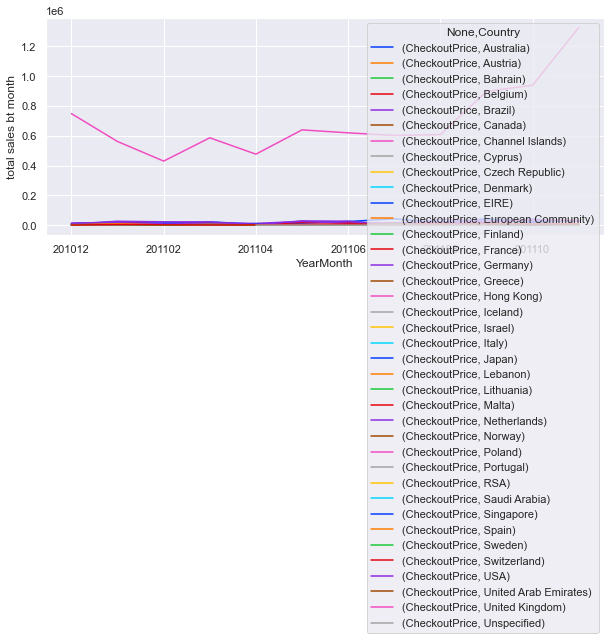

In [143]:
pd.pivot_table(agg_by_month, index='YearMonth', columns='Country', values=['CheckoutPrice'], aggfunc='sum').plot()
plt.ylabel('total sales bt month')


## b. 제품 측면
- StockCode별 판매수량 및 판매액 분포
    - 거래액이 작고 거래가 많이 발생하는 제품과 거래액이 크고 거래가 적게 발생하는 제품의 분포 등에 따라 수수료 방식을 판단할 수 있음

## c. 이용자 측면
- 고객 당 구매액의 분포
- 고객 당 구매횟수의 분포
    - 고객이 지속적으로 물품을 구매하는지, 혹은 단발성 구매로 끝나는지
    - 고객의 구매패턴
- 국가별 구매액 분포
- 시간, 요일, 계절별 패턴

### 제품별 판매수량 분포 살펴보기

/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity'>

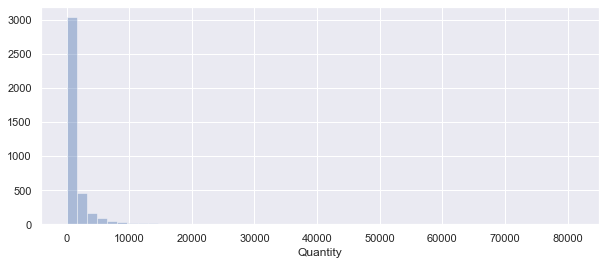

In [76]:
# StockCode(각제품별)로 판매수량을 합산한다음 순차정렬해서 hist
sort_by_quant = df.groupby('StockCode').sum().reset_index()
sns.set(rc = {'figure.figsize':(10,4)})
sns.distplot(sort_by_quant['Quantity'], kde=False) # 커널밀도추정 제외

1만개 이상 팔린 메가히트 제품은 거의 없다는 걸 알 수 있음.  
좀 더 직관적으로 이해되도록 가로축을 제품으로, 세로축을 판매량으로 그래프 재구성하기

Text(0, 0.5, 'Quantity')

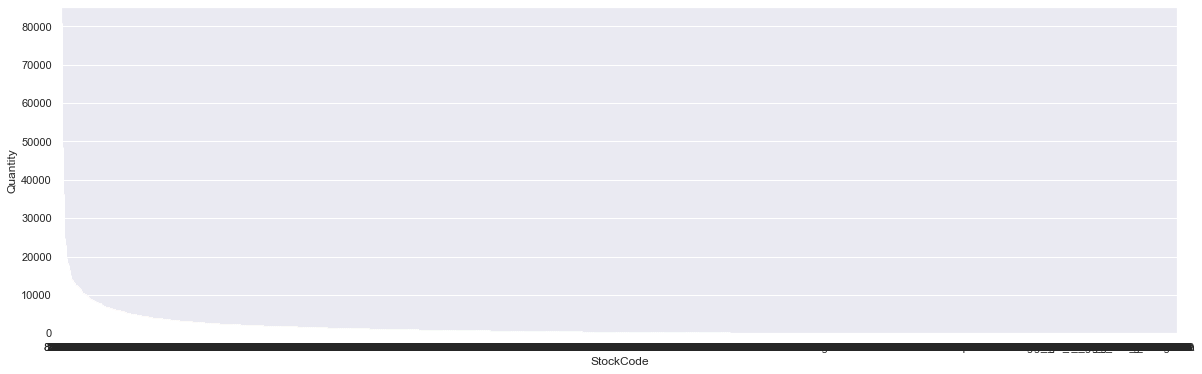

In [97]:
plt.figure(figsize=(20,6))
sns.barplot(x=sort_by_quant['StockCode'], 
            y=sort_by_quant['Quantity'], 
            data=sort_by_quant, 
            order=sort_by_quant.sort_values('Quantity', ascending=False).StockCode)

plt.xlabel('StockCode')
plt.ylabel('Quantity')

전형적인 롱테일 비즈니스의 형태를 보이는 것을 알 수 있음

> 추가 필요 : 메가히트 제품을 구매한 고객과 구매하지 않은 고객 사이에 매출액의 차이가 있는가?

### 제품의 가격과 판매량 사이에 관계가 있는지 살펴보기
- 저렴한 제품이 더 많이 팔리나?